In [33]:
!pip install ultralytics

In [30]:
from ultralytics import YOLO
from PIL import Image
from google.colab.patches import cv2_imshow
import cv2
model = YOLO("yolov5s.pt")

PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



In [46]:
image_path = "/content/pessoa.jpeg"

In [47]:
image = cv2.imread(image_path)
results = model.predict(image_path)
for result in results:
    for box in result.boxes:
        class_id = result.names[box.cls[0].item()]
        cords = box.xyxy[0].tolist()
        cords = [int(x) for x in cords]
        confidence = round(box.conf[0].item(), 2)

        cv2.rectangle(image, (cords[0], cords[1]), (cords[2], cords[3]), (0, 255, 0), 2)
        cv2.putText(image, f"{class_id}: {confidence}", (cords[0], cords[1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)


image 1/1 /content/pessoa.jpeg: 384x640 1 person, 12.1ms
Speed: 2.3ms preprocess, 12.1ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


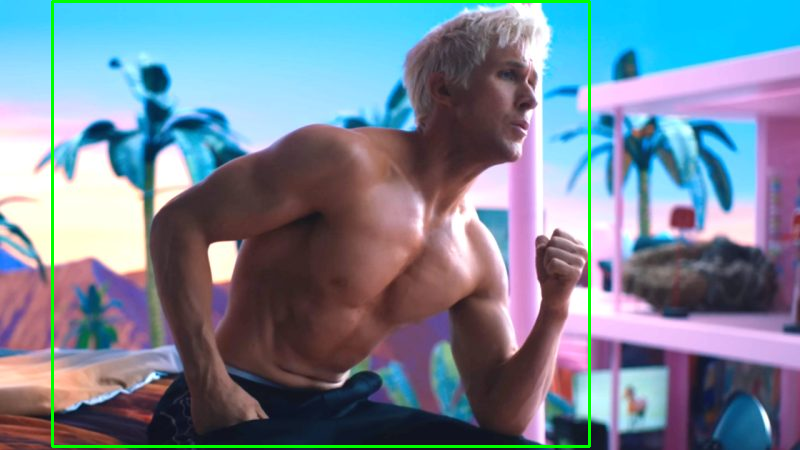

In [48]:
cv2_imshow(image)